In [17]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import glob
import os

In [18]:
files = glob.glob("data/*.csv")
dfs = []
for file in files:
    dataframe = pd.read_csv(file, index_col=False, dtype={'val': int}, parse_dates=[3])
    dfs.append(dataframe)

In [19]:
# merge data frames
merged = pd.concat(dfs)
# drop duplicate rows with smallest values
merged = merged.sort_values('val', ascending=False).drop_duplicates(['kind', 'metric', 'thing', 'ts']).set_index("ts")
merged.sort_index(inplace=True)
df = merged

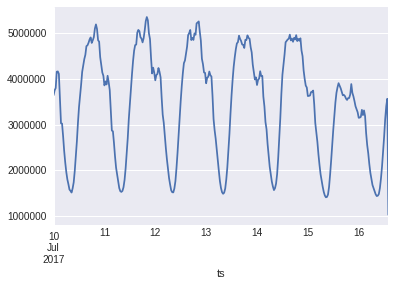

In [20]:
query = (df["kind"] == "network") & (df["thing"] == "Parsely") & (df["metric"] == "events")
results = df[query]
results["2017-07-10":]["val"].resample("30Min").sum().plot()

In [21]:
results
array = results["val"].as_matrix()

In [22]:
type(array)

numpy.ndarray

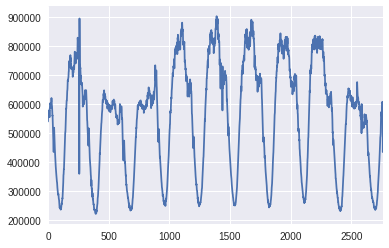

In [23]:
sns.tsplot(array)

In [24]:
array.sum()

1537815264

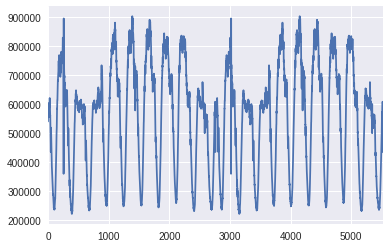

In [25]:
x = np.array(array)
y = np.array(array)
sns.tsplot(np.concatenate([x, y]))

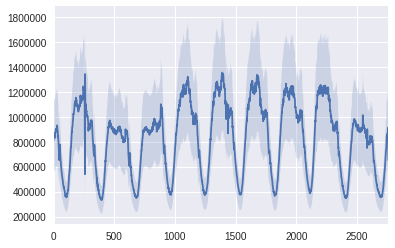

In [26]:
sns.tsplot(np.vstack([x, x*2]))

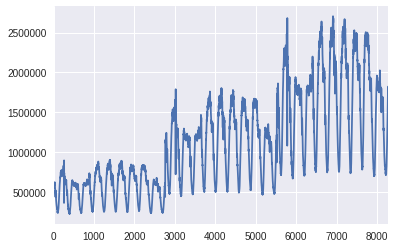

In [27]:
sns.tsplot(np.hstack([x, x*2, x*3]))

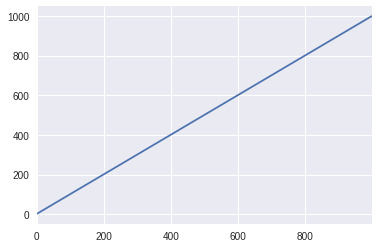

In [28]:
sns.tsplot(np.arange(1, 1000))

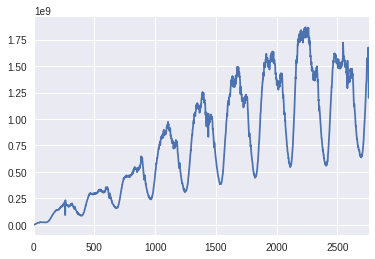

In [29]:
sns.tsplot(x * np.arange(0, len(x)))